___
# Atividade: Combinação linear de variáveis aleatórias 

## Contexto Teórico
___

## Aula 17

**Preparo Prévio:**
1. Montgomery e Runger (6ª Edição): Seção 5.4 (págs 148 a 152). 

**Hoje:**
1. Reconhecer as variáveis aleatórias de interesse em um problema qualquer. 
2. Aplicar propriedades de esperança e variância quando há combinação linear entre variáveis aleatórias.


**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª Edição): Seção 7.3 (págs 234 a 240).
2. Leitura prévia necessária: Montgomery e Runger (6ª Edição): Capítulo 7 (até Seção 7-2) (págs 191 a 198)
___

___
## Motivação 

A seguir, considere duas variáveis aleatórias, ambas contínuas, cujo objetivo seja somá-las!

Vamos criar um experimento. Sejam:

 $X \sim$ Uniforme$(4,7)$, ou seja, $a=4$ e $b=7$

e 

 $Y \sim$ Exponencial$(3)$, ou seja, $\beta=3$.

Inicialmente realizaremos o plot de ambas as distribuições univariadamente. Veja Aula12 caso tenha dúvidas com essas duas distribuições.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, expon
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Vamos criar uma faixa no eixo x, válida para ambas
eixo_x = np.linspace(-1, 15, 300)

In [3]:
# X: uniforme entre 4 a 7
a = 4
b = 7
loc_unif = a
scale_unif = b - a # Veja o zôo de distribuições
pdf_unif = uniform.pdf(eixo_x, loc=loc_unif, scale=scale_unif)

In [4]:
# Y: exponencial com média 3
scale_exp = 3
pdf_exp = expon.pdf(eixo_x, scale=scale_exp)

___
Agora realizaremos o *plot* de ambas sobre o mesmo eixo:

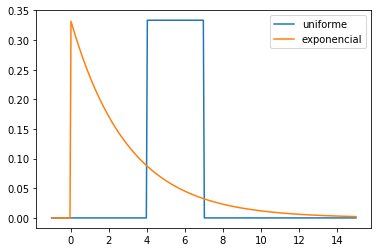

In [5]:
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');


## Entretanto, o que significa fazer $Z = X + Y$ ?

___
## Programando a função X + Y

Para vermos como ficaria a função $X + Y$, devemos:
* Obter uma amostra de X
* Obter uma amostra de Y
* Somar ambas as amostras

No `scipy.stats`, a função que gera uma amostra conforme uma distribuição é a `rvs()`. Por exemplo, `uniform.rvs()` ou `expon.rvs`

Desta forma, vamos programar $Z = X + Y$

In [6]:
n = 50000
amostras = []

for i in range(n):
    x = uniform.rvs(loc=loc_unif, scale=scale_unif)
    y = expon.rvs(scale=scale_exp)
    z = x + y
    amostras.append(z)


In [7]:
x

4.8512621443919395

Dependendo das distribuições somadas, a fórmula da distribuição resultante é conhecida. 

Agora vamos proceder de forma empírica e visualizar apenas o histograma do resultado, que deve lembrar o formato da distribuição resultante.

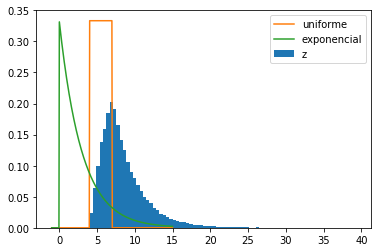

In [8]:
plt.hist(amostras, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');

**Pontos importantes:** Implementar $X+Y$ é somar uma amostra de $X$ com uma amostra de $Y$ e obter uma nova distribuição, cuja área também valerá $1$!!!

___
## Melhorando a performance na simulação

Ao invés de fazer o *loop* para gerar $n$ amostrar em Python, podemos já pedir à função `rvs()` que realize $n$ sorteios utilizando argumento `size=n`. 

In [9]:
x_ = uniform.rvs(loc=loc_unif, scale=scale_unif, size=n)
y_ = expon.rvs(scale=scale_exp, size=n)
z_ = x_ + y_ # note que estamos somando elemento a elemento de x_ e y_ e obtendo um novo array

Analisando associação entre as duas variáveis simuladas X e Y:

In [10]:
#Cálculo da Correlação entre X e Y - via Numpy
np.corrcoef(x_,y_)

array([[1.00000000e+00, 1.26980801e-04],
       [1.26980801e-04, 1.00000000e+00]])

In [11]:
#Cálculo da Correlação entre X e Y - via Pandas
pd.Series(x_).corr(pd.Series(y_))

0.00012698080091552767

In [12]:
#Cálculo da Covariância entre X e Y - via Pandas
pd.Series(x_).cov(pd.Series(y_))

0.00032889902241118956

Observe que o resultado não se altera, mas o desempenho é melhor

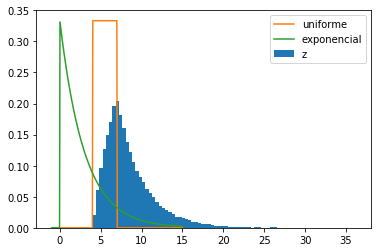

In [13]:
plt.hist(z_, label="z", bins=80, density=True)
plt.plot(eixo_x, pdf_unif, label="uniforme")
plt.plot(eixo_x, pdf_exp, label="exponencial")
plt.legend(loc='upper right');

___
### ESTUDANDO PROPRIEDADES DE ESPERANÇA E VARIÂNCIA EM COMBINAÇÃO LINEAR DE VARIÁVEIS ALEATÓRIAS:

### E(Z): Valor esperado da Z calculada a partir dos dados gerados

In [14]:
z_.mean()

8.52348382837734

In [15]:
np.mean(z_)

8.52348382837734

### Var(Z): Variância da Z calculada a partir dos dados gerados

In [16]:
z_.var()

9.724990329151586

In [17]:
np.var(z_, ddof=0) # o denominador da variância tem um termo (n - ddof).

9.724990329151586

___
## Contrastando com previsão teórica

Dica: Veja `Aula12 PARTE 2 Modelos Probabilísticos Contínuos - Uniforme e exponencial.pdf`

### E(Z): Valor esperado da Z calculada a partir da teoria

**Previsão teórica de E(Z) = E(X)  + E(Y)**

Relembrando:

- Para a Uniforme temos:

$$E(X) = \frac{a + b}{2} = 5.5$$

- Para a Exponencial temos:

$$E(Y) = \beta = 3$$

Portanto, 

$$E(Z) = E(X + Y) = 8.5$$


### Var(Z): Variância da Z calculada a partir da teoria

**Previsão teórica de Var(Z) = Var(X) + Var(Y) + 2 * Cov(X,Y)**

Relembrando:

- Para a Uniforme temos:

$$ \sigma^2_X = Var(X) = \frac{(b-a)^2}{12} = 0.75$$

- Para a exponencial temos:

$$\sigma^2_Y = Var(Y) = \beta^2 = 9$$

Portanto, assumindo que as variáveis são INDEPENDENTES até mesmo pela maneira que foram geradas, então:

$$Var(Z) = Var(X) + Var(Y) = \sigma_X^2 + \sigma_Y^2 =  9.75$$


**Os valores de E(Z) e Var(Z) calculados a partir dos dados gerados ficam bem próximos da previsão teórica!**

___
# EXERCÍCIOS

___
## Exercício 1

Sejam $X \sim Exp(\beta=10)$ e $Y \sim Exp(\beta=20)$, duas variáveis aleatórias independentes.  

Vamos definir a variável aleatória $Z$ como $Z = 2X + 3Y$

Responda:

**a.** Qual deve ser $E(Z)$ e $Var(Z)$? Responda usando a teoria.

**Resposta**:

### Esperança de Z:

$E[Z] = E[2 X + 3 Y] = E[2 X] + E[3 Y] = 2 E[X] + 3 E[Y]$

Como $X \sim Exp(10)$, então $E[X] = 10$.

Como $Y \sim Exp(20)$, então $E[Y] = 20$.

Portanto $E[Z] = 2 E[X] + 3 E[Y] = 2 \times 10 + 3 \times 20 = 80$


### Variância de Z: 

$Var[Z] = Var[2 X + 3 Y] = Var[2 X] + Var[3 Y] + 2 * Cov(2 X, 3 Y) = 2^2 Var[X] + 3^2 Var[Y] + 2\times 3\times 4\times Cov(X,Y)$

Como $X \sim Exp(10)$, então $Var[X] = 10^2 = 100$.

Como $Y \sim Exp(20)$, então $Var[Y] = 20^2 = 400$.

Portanto $Var[Z] = 4 Var[X] + 9 Var[Y] + 24\times Cov(X,Y) = 4\times 100 + 9\times 400 + 24\times 0 = 4000$

**Note que assumiu-se independência entre as duas variáveis X e Y!**

**b.** Verifique, através de simulação, o resultado anterior.  Não se esqueça de apresentar os valores de $E(Z)$ e $Var(Z)$ obtidos a partir dos dados

Esperança: E(X) = 9.99, E(Y) = 19.99, E(Z) = 79.95
Variância: V(X) = 100.01, V(Y) = 399.65, V(Z) = 3997.33
Covariância: Cov(X,Y) = 0.04


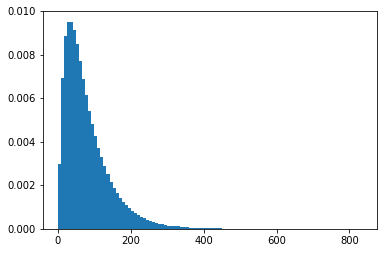

In [25]:
n = 1000000
X = expon.rvs(scale=10, size=n)
Y = expon.rvs(scale=20, size=n)
Z = 2*X + 3*Y

print("Esperança: E(X) = {0:.2f}, E(Y) = {1:.2f}, E(Z) = {2:.2f}".format(X.mean(), Y.mean(), Z.mean()))
print("Variância: V(X) = {0:.2f}, V(Y) = {1:.2f}, V(Z) = {2:.2f}".format(X.var(), Y.var(), Z.var()))
print("Covariância: Cov(X,Y) = {0:.2f}".format(pd.Series(X).cov(pd.Series(Y))))

plt.hist(Z, bins=100, density=True);

___
## Exercício 2

Dadas duas variáveis aleatórias normais $X$ e $Y$, não correlacionadas entre si, com médias de 100 e 150, e desvios padrão de 30 e 40, respectivamente:

**a** Quais seriam $E(X + Y)$ e $V(X + Y)$ conforme a teoria? Que formato teria a distribuição?

**Resposta**: 

Pelo enunciado temos $X \sim N(\mu_X=100, \sigma_X^2=(30)^2)$ e $Y \sim N(\mu_Y=150, \sigma_Y^2=(40)^2)$. Ademais, $X$ e $Y$ não são correlacionadas entre si, portanto $Cov(X, Y)= 0$.

Na teoria vimos que 

* $E(X + Y) = E(X) + E(Y)$ e 
* $V(X + Y) = V(X) + V(Y) + 2 Cov(X, Y)$.

Portanto, neste exercício temos:

$$
\begin{align}
E(X + Y) & = E(X) + E(Y) \\
& = \mu_X + \mu_Y \\
& = 100 + 150 \\
& = 250
\end{align}
$$
e 
$$
\begin{align}
V(X + Y) & = V(X) + V(Y) + 2 Cov(X, Y) \\
& = \sigma_X^2 + \sigma_Y^2 + 2 Cov(X, Y) \\
& = 30^2 + 40^2 + 0 \\
& = 2500
\end{align}
$$

Por fim, pela "Propriedade reprodutiva da normal", a soma de variáveis aleatórias normais INDEPENDENTES (só vale para a normal!) vai também ser normal. Ou seja, 

$$
\left\{
\begin{align}
& Z = X + Y \\
& X \sim N(\mu_X=100, \sigma_X^2=(30)^2) \\
& Y \sim N(\mu_Y=150, \sigma_Y^2=(40)^2) \\
& Cov(X, Y) = 0
\end{align}
\right\}
\Rightarrow
Z \sim N(\mu_Z=250, \sigma_Z^2 = 2500)
$$

**b** Simule este resultado.

Esperança: E(X) = 100.02, E(Y) = 150.03, E(Z) = 250.05
Variância: V(X) = 899.44, V(Y) = 1601.71, V(Z) = 2499.33
Covariância: Cov(X,Y) = -0.91


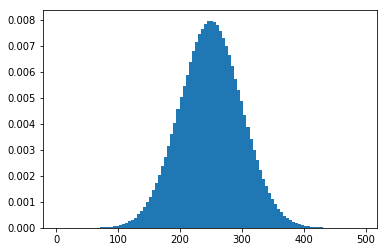

In [26]:
from scipy.stats import norm

n = 1000000
X = norm.rvs(loc=100, scale=30, size=n)
Y = norm.rvs(loc=150, scale=40, size=n)
Z = X + Y

print("Esperança: E(X) = {0:.2f}, E(Y) = {1:.2f}, E(Z) = {2:.2f}".format(X.mean(), Y.mean(), Z.mean()))
print("Variância: V(X) = {0:.2f}, V(Y) = {1:.2f}, V(Z) = {2:.2f}".format(X.var(), Y.var(), Z.var()))
print("Covariância: Cov(X,Y) = {0:.2f}".format(pd.Series(X).cov(pd.Series(Y))))

plt.hist(Z, bins=100, density=True);